### Recommendation Engine with Text Input

In [1]:
import base64
import io

import cv2
import numpy as np
from matplotlib import pyplot as plt
from sentence_transformers import SentenceTransformer, util
from torch.nn import CosineSimilarity
import torch
import pickle
import csv
import os
from PIL import Image

INP_FILE_PATH = "styles.csv"
header = True
n_rows = 20_000
MODEL_PATH = r"models/model_fashion_text.pickle"
list_prod_id = list()
list_prod_disp_name = list()
with open(INP_FILE_PATH) as file:
    rows = csv.reader(file)
    for row in rows:
        if header:
            header = False;
            continue
        else:
            list_prod_id.append(row[0])
            list_prod_disp_name.append(row[9])
list_prod_dispname = list(map(lambda x: x.strip().casefold(), list_prod_disp_name))
# print(list_prod_disp_name[:5], list_prod_dispname[:5])
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
with open(MODEL_PATH, "rb") as file:
    text_embs = pickle.load(file)


def recommend_similar_prods(search_item):
    search_item_emb = model.encode([search_item.strip().casefold()])  # compute embedding
    cosine_similarity = CosineSimilarity()
    prod_idx = np.argsort(cosine_similarity(torch.from_numpy(search_item_emb), torch.from_numpy(text_embs)))
    list_idx = prod_idx.tolist()[-5:]
    return list(map(list_prod_id.__getitem__, list_idx))


def showimage(prod_id, imagelabel):
    imagepath = "images/"
    image = cv2.imread(imagepath + str(int(prod_id)) + ".jpg")
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(RGB_img)
    plt.title(f" {imagelabel} :\n")
    plt.show()


def recommend_text(search_item):
    list_similar_prods = recommend_similar_prods(search_item)
    value = str()
    for prod_id in list_similar_prods:
        title = list_prod_disp_name[list_prod_id.index(prod_id)]
        showimage(prod_id, title)


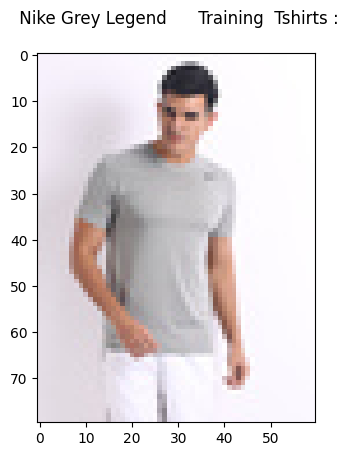

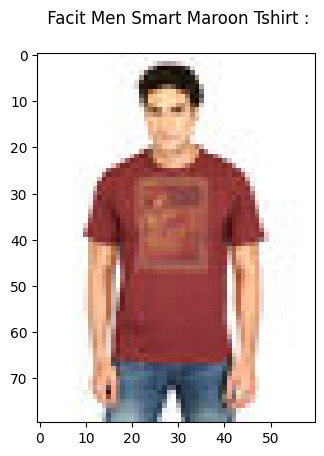

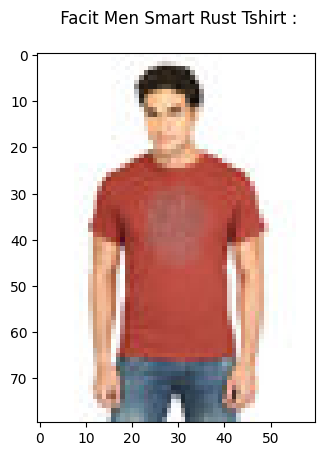

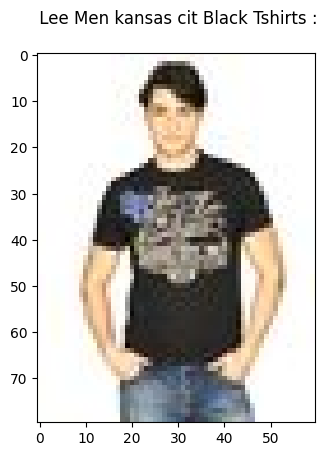

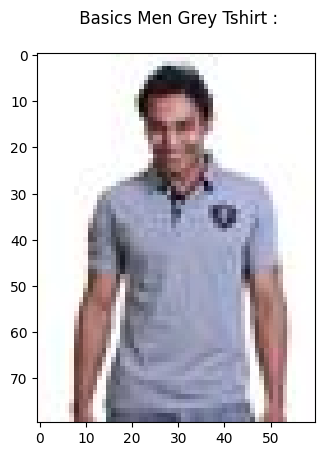

In [2]:
recommend_text("tshirt for Men")